In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import linear_model

In [9]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

Epoch 0: m = 0.62, b = 0.18, cost = 89.0
Epoch 100: m = 2.4469521472074027, b = 1.3863609314182666, cost = 0.4771638970482712
Epoch 200: m = 2.318550968403369, b = 1.8499299283889075, cost = 0.24238368296104512
Epoch 300: m = 2.227037100288903, b = 2.1803240294752406, cost = 0.12312299846905057
Epoch 400: m = 2.1618134930367656, b = 2.4158019469939687, cost = 0.06254246394319472
Epoch 500: m = 2.115327435451919, b = 2.5836313648214624, cost = 0.031769530020575504
Epoch 600: m = 2.082195972154773, b = 2.703246459880537, cost = 0.016137884152517098
Epoch 700: m = 2.058582572412138, b = 2.788498325442612, cost = 0.008197518337583162
Epoch 800: m = 2.0417528706146477, b = 2.8492588889670167, cost = 0.004164071712246711
Epoch 900: m = 2.029758034391168, b = 2.8925640536747035, cost = 0.002115212496108267
Epoch 1000: m = 2.021209095273925, b = 2.9234284364516427, cost = 0.001074458898134308
Epoch 1100: m = 2.0151161100368897, b = 2.945426046451087, cost = 0.0005457900451628507
Epoch 1200: m 

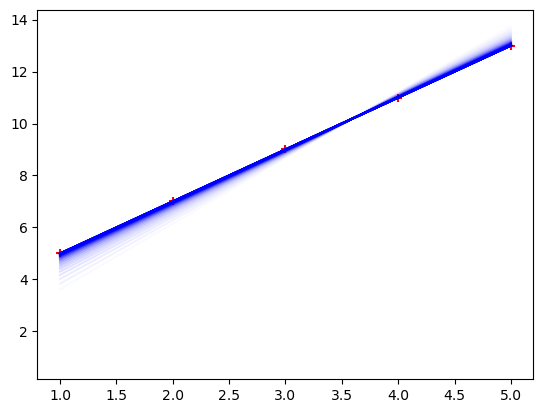

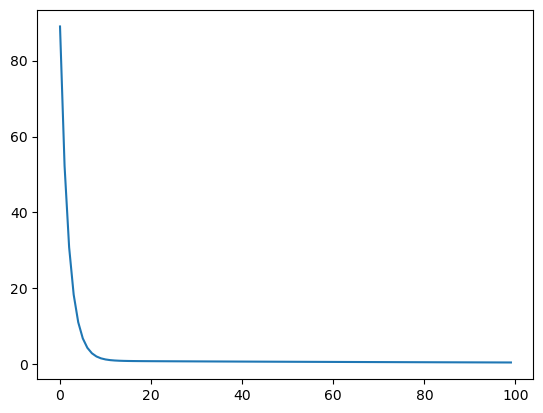

In [10]:
def gradient_descent(x, y, epochs=1000, learning_rate=0.01):
    m_curr = b_curr = 0
    n = len(x)

    cost_values = []

    for epoch in range(epochs):
        y_pred = m_curr * x + b_curr

        md = -(2/n) * sum(x * (y - y_pred))
        bd = -(2/n) * sum(y - y_pred)

        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd

        cost = np.mean(np.square(y - y_pred))
        cost_values.append(cost)       

        if epoch > 0:
            if math.isclose(cost, cost_values[epoch-1], rel_tol=1e-20, abs_tol=1e-20):
                break

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: m = {m_curr}, b = {b_curr}, cost = {cost}")
    
        if epoch % 50 == 0:
            plt.plot(x, m_curr * x + b_curr, color='blue', alpha=epoch / epochs)      

    print(f"Epoch {epoch}: m = {m_curr}, b = {b_curr}, cost = {cost}")

    plt.scatter(x, y, color='red', marker='+')
    plt.show()    

    plt.plot(cost_values[:100])
    plt.show()

gradient_descent(x, y, epochs=2000, learning_rate=0.01)

# Exercise
### Find correlation between Computer Science scores and Math scores with a list of alumns.

Epoch 0: m = 0.9891800000000002, b = 0.013980000000000001, cost = 5199.1
Epoch 100: m = 1.0445225676937555, b = 0.01694164562385224, cost = 31.811376195552935
Epoch 200: m = 1.0444918373600534, b = 0.019119424605773216, cost = 31.810901820768134
Epoch 300: m = 1.0444611422814014, b = 0.021294705153782113, cost = 31.81042853380193
Epoch 400: m = 1.044430482417354, b = 0.023467490134180848, cost = 31.80995633215975
Epoch 500: m = 1.0443998577275115, b = 0.02563778240998294, cost = 31.80948521335272
Epoch 600: m = 1.0443692681715206, b = 0.02780558484091739, cost = 31.809015174897798
Epoch 700: m = 1.0443387137090745, b = 0.029970900283432418, cost = 31.808546214317488
Epoch 800: m = 1.0443081942999124, b = 0.03213373159069919, cost = 31.80807832914014
Epoch 900: m = 1.0442777099038196, b = 0.0342940816126156, cost = 31.807611516899584
Epoch 1000: m = 1.0442472604806279, b = 0.03645195319581003, cost = 31.807145775135446
Epoch 1100: m = 1.0442168459902152, b = 0.038607349183645126, cost =

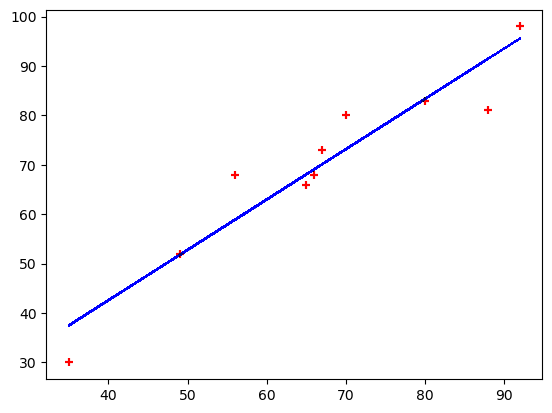

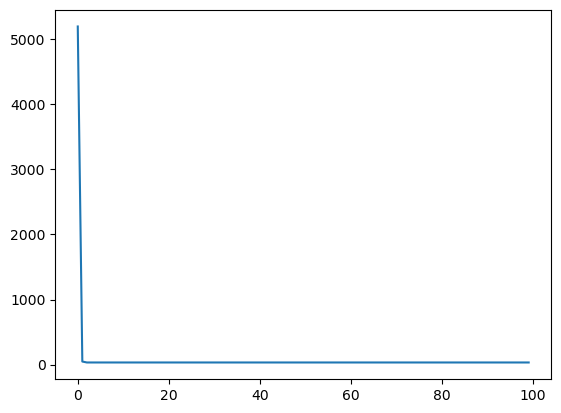

In [11]:
df = pd.read_csv('../python/csv_files/test_scores.csv')

X = np.array(df['math'])
Y = np.array(df['cs'])

plt.scatter(X, Y, color='red', marker='+')

gradient_descent(X, Y, epochs=100000000, learning_rate=0.0001)

In [12]:
reg = linear_model.LinearRegression()
reg.fit(df[['math']], df.cs)

LinearRegression()

In [13]:
# This is the value of m
print(reg.coef_)

# This is the value of b
print(reg.intercept_)

[1.01773624]
1.9152193111569034


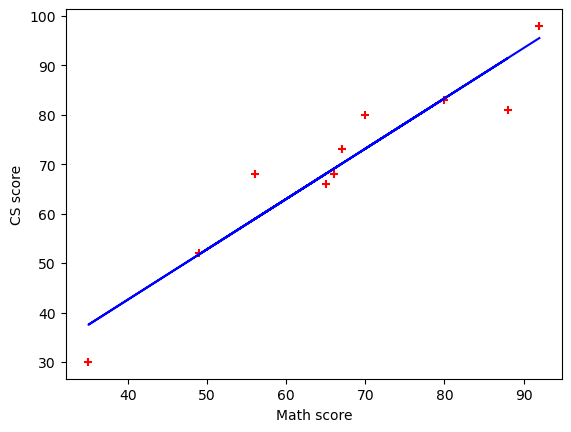

In [14]:
%matplotlib inline
plt.xlabel('Math score')
plt.ylabel('CS score')
plt.scatter(df.math, df.cs, color='red', marker='+')
plt.plot(df.math, reg.predict(df[['math']]), color='blue')